## Stock Market Prediction with Machine Learning 

**Objectives:**

* To create a machine learning model that can predict the following day's S&P index price given historical data
* To back test the model on 20+ years of historical data

## Workflow
Here are the steps taken when doing this project:
1. [Importing libraries](#libraries)
2. [Download S&P 500 Price data](#data-download)
3. [Data Cleaning and visualization](#cleaning)
4. [Setting up the target for ML](#target-setup)
5. [Training an initial ML model](#initial-model)
6. [Building a Backtesting system](#backtest)
7. [Add additional predictors to model](#add-predictors)
8. [Improving the model](#improve-model)

<a name="libraries"></a>
### 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

%matplotlib inline
pd.set_option("display.max_columns", 50)

### 2. Download S&P 500 Price data

First import the `yfinance` package, that calls the Yahoo Finance API to download daily stock and index prices

In [2]:
import yfinance as yf

[Helpful Read](https://medium.com/@kasperjuunge/yfinance-10-ways-to-get-stock-data-with-python-6677f49e8282)\
The `Ticker` class allows you to to access various data for a specific stock.\
In our case, it will enable us to download the price history for a single symbol,the **^GSPC** for the S&P500 index.

In [3]:
# initializing the Ticker class
sp500 = yf.Ticker("^GSPC")

In [4]:
# querying the history using history() method
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,0.0,0.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,0.0,0.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,0.0,0.0


In the dataframe, each row shows the price in a single trading day, non-trading days are not included.\
Columns explained:
- Open: opening price when the market opened
- High: highest price during the day
- Low: lowest price during the day
- Close: closing price when the exchange closed
- Volume: trading volume(quantity of shares belonging to the stock) for the day
- Dividends: portion of a company's earnings paid to shareholders.
- Stock splits: when a company increases  the number of oustanding shares of stock to boost the stock's liquidity.


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-16 00:00:00-05:00', '2024-02-20 00:00:00-05:00',
               '2024-02-21 00:00:00-05:00', '2024-02-22 00:00:00-05:00',
               '2024-02-23 00:00:00-05:00', '2024-02-26 00:00:00-05:00',
               '2024-02-27 00:00:00-05:00', '2024-02-28 00:00:00-05:00',
               '2024-02-29 00:00:00-05:00', '2024-03-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24157, freq=None)

<a name="cleaning"></a>
### 3. Cleaning and visualizing the data

<Axes: xlabel='Date'>

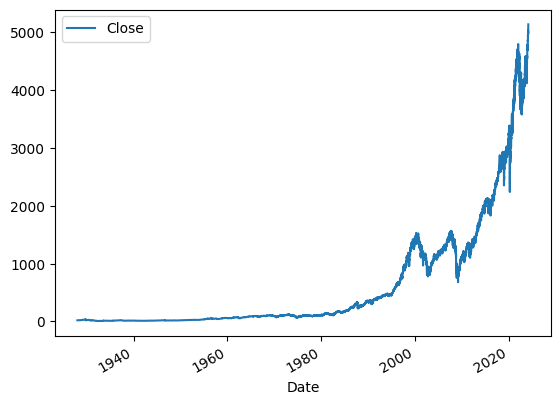

In [7]:
#plotting the closing price line chart
sp500.plot(kind="line", y="Close", use_index=True)

An interesting method to drop columns in a dataframe is using `del` to delete the column using the syntax `del df['column name']`

In [8]:
# removing the dividends and stock splits columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000


<a name="target-setup"></a>
### 4. Set up the target for ML

In [10]:
# creating a column called Tomorrow(tomorrow's price) using shift method 
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020


Shifting a column is moving its values up and down by a certain number of rows.This is achieved in pandas using the `shift()` function. The function takes a single argument, that is the number of rows to shift the column by.\
If the arguments are positive, the column values are shifted downwards, if negative, the values are shifted upwards.\
In our case, the Close column prices were shifted back one day(by one row) to form the Tomorrow column.This enables us to create a column that shows tomorrow's price based on the future closing prices!😃

In [11]:
# using Tomorrow column to set up the target
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

Output is a boolean indicating whether tomorrow's price is greater than today's price\
It's a `1` when the price is `higher`(price increased) and a `O` when the price is `lower`(price decreased)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


In [13]:
# choosing only data that came after 1990
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1


<a name="initial-model"></a>
### 5. Training an initial ML model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# creating instance of the class
rand_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)


In [15]:
sp500.shape

(8607, 7)

In [16]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

In [17]:
# splitting the data into train and test sets

# training set has all of the rows except the last 100
train_set = sp500.iloc[:-100]
# test data=last 100 rows
test_set = sp500.iloc[-100:]

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']

When dealing with time series data, it's advisable not to use crossvalidation or any other splitting method that doesn't consider the time series nature of the data.This is because you will be using future data to predict the past, which is impractical, and will result in leakage(leaking information into the model).

In [18]:
# fiting the model
rand_model.fit(train_set[features], train_set["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

Since I'm familiar with the usual `train_test_split()` method, this is how I interpret the train and test sets for better understanding:
```python
X_train = train_set[features]
y_train = train_set["Target"]
X_test = test-set[features]
y_test = test_set["Target"]
```


In [19]:
# predicting
predicts = rand_model.predict(test_set[features])

In [20]:
predicts

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Turning predicts fron numpy array to pandas series
predicts = pd.Series(data=predicts, index = test_set.index )

In [22]:
predicts

Date
2023-10-09 00:00:00-04:00    0
2023-10-10 00:00:00-04:00    1
2023-10-11 00:00:00-04:00    1
2023-10-12 00:00:00-04:00    1
2023-10-13 00:00:00-04:00    1
                            ..
2024-02-26 00:00:00-05:00    0
2024-02-27 00:00:00-05:00    0
2024-02-28 00:00:00-05:00    0
2024-02-29 00:00:00-05:00    0
2024-03-01 00:00:00-05:00    0
Length: 100, dtype: int32

In [23]:
# evaluating model using precision score
from sklearn.metrics import precision_score

precision_score(test_set["Target"], predicts)

0.48

Precision tells us what percentage of the model's positive predictions were correct.\
In this model, only 48% of the predictions were true. This means,out of the total times the model predicted a positive/true, only 48% of those preditions were actually true

In [24]:
# combining actual values (test_set["Target"]) and the predicted  values predicts
combined = pd.concat([test_set["Target"], predicts], axis=1)

In [25]:
combined.head()

,Target,0
Date,,
2023-10-09 00:00:00-04:00,1,0
2023-10-10 00:00:00-04:00,1,1
2023-10-11 00:00:00-04:00,0,1
2023-10-12 00:00:00-04:00,0,1
2023-10-13 00:00:00-04:00,1,1


<Axes: xlabel='Date'>

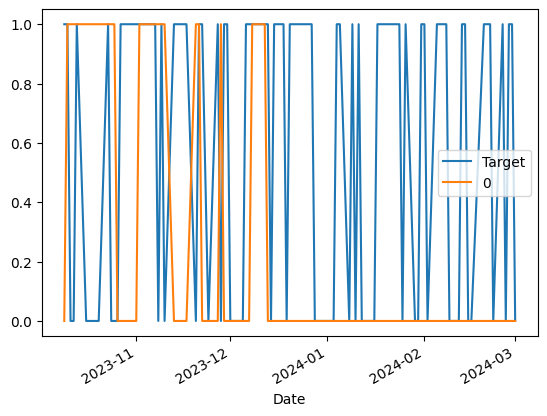

In [26]:
combined.plot()

The orange lines(0) are the model's predictions and the blue lines are what actually happened.\
The model mostly(from the start of 2024 onwards) predicted the prices to have gone down, which was not the case.


<a name="backtest"></a>
### 6. Building a Backtesting system

Backtesting involves applying a strategy or predictive model to historical data to determine its accuracy.\
The theory is that if their strategy performed poorly in the past, it is unlikely to perform well in the future (and vice versa)

In [27]:
# create a prediction function that fits and predicts
def predict(train_set, test_set, features, rand_model):
    rand_model.fit(train_set[features], train_set["Target"])
    predicts = rand_model.predict(test_set[features])
    predicts = pd.Series(data=predicts, index = test_set.index, name="Predictions")
    combined = pd.concat([test_set["Target"], predicts], axis=1)
    return combined
    

In [28]:
# create a backtesting function
def backtest(data, rand_model, features, start=2500, step=250):
    all_predictions = [] # list of dataframes, where each dataframe is the predictions for a single year

    # looping across the data
    for i in range(start, data.shape[0], step):
        train = data.iloc[:i].copy() # training set is all years before current year
        test = data.iloc[i:(i+step)].copy() # test set is the current year
        predictions = predict(train,test, features,rand_model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)
    

During backtesting, one takes a certain amount of data to train the first model.\
Every trading year has around 250 days.To train the **first** model with ten years of data, it requires us to start at an index of 2500 (250x10).\
What is happening is that the model is initially using the first 10 years of data to train and then predict values for the 11th year.Then takes values for the first 11 years and use it to predict the 12th year, first 12 years of data and predict values for the 13th year...\
Here is how the loop works:\
`for i in range(start, data.shape[0], step):` Here the for loop is 'initialised' at 2500 index and then incremented in steps of 250 upto the value of the total rows in the dataframe.\
`train = data.iloc[:i].copy()`, the training data is all data before the current index (i)/day\
`test = data.iloc[i:(i+step)].copy()`, the test data is all data from the current index(i)/day to the next 250 days, which is equivalent to 1 trading year from current day\
`predictions = predict(train, test, features, rand_model)` calling the predict function previously created and assigning output to predictions\
`all_predictions.append(predictions)` appending the all_predictions list with the trading year's prediction


In [29]:
prediction = backtest(sp500, rand_model, features)

In [30]:
prediction

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2024-02-26 00:00:00-05:00,1,0
2024-02-27 00:00:00-05:00,0,0
2024-02-28 00:00:00-05:00,1,0


In [31]:
# seeing how many times the index price was predicted to increase and to decrease
prediction.Predictions.value_counts()

Predictions
0    3535
1    2572
Name: count, dtype: int64

In [32]:
# checking the error of the predictions
precision_score(prediction["Target"], prediction["Predictions"])

0.5217729393468118

The predictions were about 52% correct/precise. This means of the number of times the model predicted the index price to rise, it only rose 52% of the times.

In [33]:
prediction.Target.value_counts()/prediction.shape[0]

Target
1    0.53496
0    0.46504
Name: count, dtype: float64

The index,in reality, went up 53% of days and went down 46% of the days

In [34]:
prediction.Predictions.value_counts()/prediction.shape[0]

Predictions
0    0.578844
1    0.421156
Name: count, dtype: float64

In our predictions, the index price went down 57% of the days, and up 42% of the trading days

<a name="add-predictors"></a>
### 7. Add additional predictors to model

We will now use mean of horizons to calculate moving averages/rolling means.\
Moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different selections of the full data set.\
Example:\
Say farmer Ann has data columns date and milk yield, where date are date values for the month of June, and milk yield is the amount of milk she got daily in that very June.\
So Ann wants to get the moving averages for a week(7 days) or fortnight(14 days)-- her horizons.\
To get the rolling mean for 7 days, Ann gets the mean for the first 7 days and the result is the first moving average (ma1), she then moves to day 8 and gets the mean for the past 7 days(ma2).*NB:In getting ma2, she starts using day 2 to day 8 values (7in total), day 1 is not included*. To get ma3, she gets the milk average for day 3 to day 9 and the pattern continues. So you can see how the averages are 'moving'.\
Hope the example was useful and correct.
This [video](https://youtu.be/PuXLgZCTh5c?si=1MiCxaxctH2JCKsY) explains the concept clearly

In [36]:
# horizon in days to calculate the mean close price
horizons = [2, 5, 60, 250, 1000]
# list of new features/predictors for our model
new_features = []

for horizon in horizons:
    # Rolling() of mean with window length=horizon
    rolling_means = sp500.rolling(horizon).mean()
    
    # naming the columm based on horizon
    ratio_column = f"Close_Ratio_{horizon}"
    # ratio of close price and the rolling mean of the close price
    sp500[ratio_column] = sp500["Close"]/rolling_means["Close"]

    # trend
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    # adding columns to new_features list
    new_features.append(ratio_column)
    new_features.append(trend_column)

First time through the for loop, the ratio will be between the current close price and the average close price in the past 2 days, second time through loop is ratio between current close and the average close price in the past 5 days, and so on. Rolling means includes the current day in it's calculation.

Trend represents the number of days in the past {horizon} days that the trend actually went up. From, what I understood, the dataframe is first shifted fowards, then rolling sum, corresponding to horizon, of the target column is gotten. Since the prices going up is represented by 1 in the target column and prices going down is represented by a 0, the sum will only involves the 1's and will show the number of days the prices went up in that window/horizon.
Trend doesn't include the current day. By shifting the DataFrame by one time step, that the rolling sum used to calculate the trend aligns with the previous day's data, allowing us to capture the trend based on historical data up to the previous day.

In [37]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.147924,140.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.148730,141.0,1.258437,533.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,5096.270020,1,0.999170,1.0,0.998248,3.0,1.049863,37.0,1.145666,141.0,1.255628,533.0


In [38]:
# dropping rows with missing values
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0,1.000174,2.0,1.012144,3.0,1.059453,38.0,1.153423,141.0,1.262368,532.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.147924,140.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.148730,141.0,1.258437,533.0


<a name="improve-model"></a>
### 8. Improving the model

In [39]:
# changing some of the parameter values in model
# rand_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)
rand_model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=42)

Instead of using `.predict()`,that returns a 0 or 1, we will use `.predict_proba()`that returns the probabilities of getting 0 or 1

In [40]:
# create a prediction function that fits and predicts
def predict(train_set, test_set, features, rand_model):
    rand_model.fit(train_set[features], train_set["Target"])
    # obtaining the probability that the stock price goes up
    predicts = rand_model.predict_proba(test_set[features])[:,1]
    # setting custom threshold for model to return 1 , default is usually 0.5
    predicts[predicts >= .6] = 1
    predicts[predicts < .6] = 0 
    
    predicts = pd.Series(data=predicts, index = test_set.index, name="Predictions")
    combined = pd.concat([test_set["Target"], predicts], axis=1)
    return combined
    

📌
In Python, the syntax [:, 1] is used for slicing multi-dimensional arrays or lists, specifically when dealing with NumPy arrays or similar data structures.

* The : before the comma indicates that we want to include all rows from the array.
* The , separates the row and column slices.
* The 1 after the comma indicates that we want to select the second column (index 1) from each row. In our case, these are the probabilities of getting a 1(stock price goes up)

Setting a custom threshold of 60% ensures that the model has to be more confident that the price will go up, to return a 1. Doing this reduces the number of days the price will go up,but increase the chance that the price will go up in those days.

In [41]:
# performing backtest using new predictors/new features
prediction = backtest(sp500, rand_model, new_features)

The new features are more informative to model compared to the old features, hence are used to in backtesting

In [42]:
prediction

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-02-23 00:00:00-05:00,0,0.0
2024-02-26 00:00:00-05:00,1,0.0
2024-02-27 00:00:00-05:00,0,0.0


In [43]:
prediction.Predictions.value_counts()

Predictions
0.0    4313
1.0     793
Name: count, dtype: int64

The number of days that the model predicts the price to go up has significantly reduced. This is because of the custom thresholds in place for the predicted probabilities

In [45]:
precision_score(prediction["Target"], prediction["Predictions"])

0.575031525851198

When the model predicts the price will go up, 57% of the times, it will actually go up. This is an improvement from the previous 52%

Some of the recommendations given to further this project include:

- Checking for financial correlation between the S&P index and other stock market indexes.
- Adding key components of the S&P index for example, key sectors, and key stocks of the index.
- Increasing resolution by using hourly/ minute-by-minute/ tick data

Doing this project has been very fun and educative.I hope to continue working on it using the suggested recommendations.